# Mall Clustering
Author: Sam Steinberg, Computer Science Student- Arizona State University

Description: The goal of this project is to cluster a mall's customers based on their income and spending score (the more money they spend, the higher their scores goes up). By doing this, the mall will know who to tailor new ads to, products, etc.

### Importing Libraries

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 1- Importing Dataset

In [177]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Step 2- Finding Optimal Number of Clusters


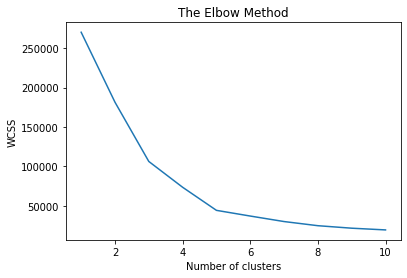

In [178]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11): #10 clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42) #k-means++ avoid the rabdin initialization trap
    kmeans.fit(X) #Fitting our data
    wcss.append(kmeans.inertia_) #Inertia computes within clusters sum of squares
    
#Plotting the Elbow Method Graph 
plt.plot(range(1, 11), wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Step 3- Training K-Means Model on Dataset

In [179]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) #Returns which cluster the client belongs to
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

## Step 4- Visualizing Clusters

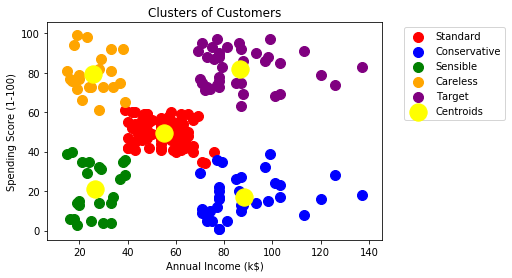

In [180]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Conservative')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Sensible')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'purple', label = 'Target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Step 5- Investigating Clusters

### Investigating Careless Cluster

In [188]:
from copy import copy, deepcopy
df = dataset.copy()
indexes = df[df['Annual Income (k$)'] > 40].index
df.drop(indexes, inplace=True)
indexes2 = df[df['Spending Score (1-100)'] < 60].index
df.drop(indexes2, inplace=True)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98


In [189]:
df['Genre'].value_counts()

Female    14
Male       9
Name: Genre, dtype: int64

In [190]:
df['Age'].value_counts()

24    3
23    3
21    3
35    3
31    2
30    2
22    2
20    2
29    1
25    1
18    1
Name: Age, dtype: int64

### Investigation Conservative Cluster

In [191]:
from copy import copy, deepcopy
df = dataset.copy()
indexes = df[df['Annual Income (k$)'] > 69].index
df.drop(indexes, inplace=True)
indexes2 = df[df['Spending Score (1-100)'] < 40].index
df.drop(indexes2, inplace=True)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
7,8,Female,23,18,94
...,...,...,...,...,...
119,120,Female,50,67,57
120,121,Male,27,67,56
121,122,Female,38,67,40
122,123,Female,40,69,58


In [193]:
df['Genre'].value_counts()

Female    60
Male      42
Name: Genre, dtype: int64

In [194]:
df['Age'].value_counts()

23    5
31    5
49    5
19    5
21    5
18    4
50    4
24    4
27    4
22    3
38    3
20    3
67    3
48    3
47    3
68    3
35    3
40    3
26    2
29    2
30    2
32    2
70    2
66    2
63    2
60    2
51    2
59    2
54    2
39    1
25    1
65    1
57    1
55    1
69    1
53    1
46    1
45    1
33    1
34    1
43    1
Name: Age, dtype: int64